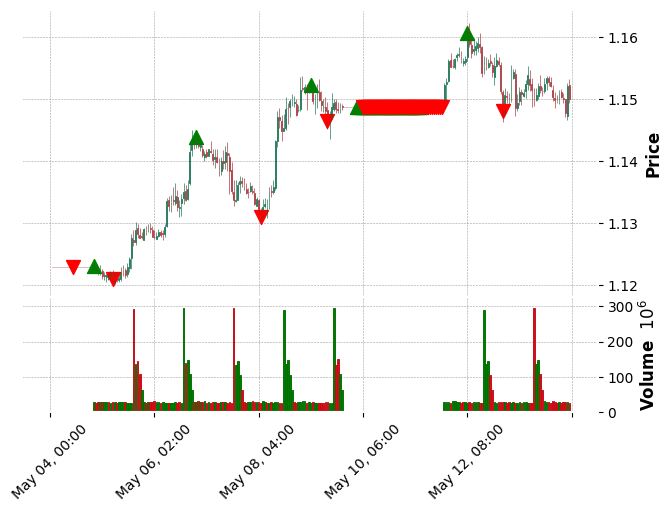

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as mpf

def rw_top(data: np.array, curr_index: int, order: int) -> bool:
    if curr_index < order * 2 +1:
        return False
    top = True
    k = curr_index - order
    v = data[k]
    for i in range(1, order + 1):
        if data[k + i] > v or data[k - i] > v:
            top = False
            break
    return top

def rw_bottom(data: np.array, curr_index: int, order: int) -> bool:
    if curr_index < order *2 + 1:
        return False
    bottom = True
    k = curr_index - order
    v = data[k]
    for i in range(1, order + 1):
        if data[k + i] < v or data[k - i] < v:
            bottom = False
            break
    return bottom

def rw_extremes(data: np.array, order:int):
    tops = []
    bottoms = []
    for i in range(len(data)):
        if rw_top(data, i, order):
            top = [i, i - order, data[i - order]]
            tops.append(top)
        
        if rw_bottom(data, i, order):
            bottom = [i, i - order, data[i - order]]
            bottoms.append(bottom)
    return tops, bottoms 

if __name__ == "__main__":
 
    data = pd.read_csv("fake_data.csv", nrows=250)

    # 📅 تبدیل زمان
    data['Gmt time'] = pd.to_datetime(data['Gmt time'], format="%d.%m.%Y %H:%M:%S.%f")
    data = data.set_index('Gmt time')

    # 🧹 فقط ستون‌های موردنیاز برای کندل‌استیک
    data = data[['open', 'high', 'low', 'close', 'volume']]

    # محاسبه سقف و کف‌ها
    tops, bottoms = rw_extremes(data['close'].to_numpy(), 10)

    # 📈 رسم کندل استیک + نقاط سقف و کف
    apds = []
    for top in tops:
        date = data.index[top[1]]
        price = top[2]
        apds.append(mpf.make_addplot(
            [price if d == date else np.nan for d in data.index],
            type='scatter', markersize=100, marker='^', color='green'
        ))

    for bottom in bottoms:
        date = data.index[bottom[1]]
        price = bottom[2]
        apds.append(mpf.make_addplot(
            [price if d == date else np.nan for d in data.index],
            type='scatter', markersize=100, marker='v', color='red'
        ))

    mpf.plot(data, type='candle', style='charles', addplot=apds, volume=True)